> Originally by Pin-Er 20220801



```
class EmitFrameInfo:
    offset_idx: int
    offset_s: float
    winsize_s: float
    mfcc_vec: np.ndarray # MFCC features [120]
    bilstm_h: np.ndarray   # biLSTM hidden vec [320]
    phone_logits: np.ndarray   # phone logits [230]
    phone_token: str    # phone token
```



## Install

Directly deploy

In [ ]:
## If to directly deploy
!pip install -U git+https://github.com/cckk2913/allosaurus@emit-frame-info#egg=allosaurus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cckk2913/allosaurus (to revision emit-frame-info) to /tmp/pip-install-wm4ykfw4/allosaurus_749a24f711f943e4a4076f572053ba92
  Running command git clone -q https://github.com/cckk2913/allosaurus /tmp/pip-install-wm4ykfw4/allosaurus_749a24f711f943e4a4076f572053ba92
  Running command git checkout -b emit-frame-info --track origin/emit-frame-info
  Switched to a new branch 'emit-frame-info'
  Branch 'emit-frame-info' set up to track remote branch 'emit-frame-info' from 'origin'.
     |████████████████████████████████| 73 kB 1.1 MB/s 
  Created wheel for allosaurus: filename=allosaurus-1.0.2-py3-none-any.whl size=52838 sha256=5deb65ff8b181c4c7294af00d23fae183a0d543fad5006af79b2a0892c8bba77
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nv1ati7/wheels/2d/88/94/291d2aa9959d8d27ff6723f6c63fb8e92b4e2e94813646d911
  Created wheel for unicodecsv: filename=unicodecsv-0

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


If to Edit

In [ ]:
## If to edit
# !mkdir src && cd src && git clone https://github.com/cckk2913/allosaurus
# !cd src/allosaurus && git checkout -b emit-frame-info
# !pip install -e src/allosaurus

In [ ]:
# %load_ext autoreload
# %autoreload 2

In [ ]:
# import sys
# if '/content/src/allosaurus' not in sys.path:
#   sys.path.append("/content/src/allosaurus")

## bilstm -- phone

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme')
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme'

In [ ]:
import allosaurus
import pandas as pd
import numpy as np
import pickle

## Pipeline

### **1) recognize audio**

In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
""""" Generate .wav files """""

def mp3audio2wav(mp3_input_path, wav_output_path, sample_rate):

  # read audio file (mp3)
  audio = AudioSegment.from_mp3(mp3_input_path)
  print(len(audio),audio.sample_width)

  try:
    audio.set_frame_rate(sample_rate).export(wav_output_path, format="wav")
    print('wav exported to ', wav_output_path)
  except Exception as e:
    print(e)

In [ ]:
mp3audio2wav('./data/黃國書-127909.mp3', './data/黃國書-127909.wav', 16000)

436139 2
wav exported to  ./data/黃國書-127909.wav


In [ ]:
mp3audio2wav('./data/許淑華-127889.mp3', './data/許淑華-127889.wav', 16000)

695083 2
wav exported to  ./data/許淑華-127889.wav


In [ ]:
mp3audio2wav('./data/趙正宇-127849.mp3', './data/趙正宇-127849.wav', 16000)

409429 2
wav exported to  ./data/趙正宇-127849.wav


In [ ]:
mp3audio2wav('./data/陳瑩-128068.mp3', './data/陳瑩-128068.wav', 16000)

457472 2
wav exported to  ./data/陳瑩-128068.wav


**Recognize .wav files**

In [ ]:
def recognizeWav2EmitFrames(person, recognizer, lang='cmn'):

  # person (e.g. '劉櫂豪-127903')
  wav_filepath = "./data/"+ person +".wav"

  emit_frames = recognizer.recognize(wav_filepath, lang)

  print(len(emit_frames), ' EmitFrames in this .wav file')
  print('EmitFrames[0]: ', emit_frames[0], emit_frames[0].offset_idx, emit_frames[0].offset_s)

  return emit_frames

In [ ]:
from allosaurus.app import read_recognizer

# load model
recognizer = read_recognizer()

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


downloading model  latest
from:  https://github.com/xinjli/allosaurus/releases/download/v1.0/latest.tar.gz
to:    /usr/local/lib/python3.7/dist-packages/allosaurus/pretrained
please wait...


In [ ]:
person = '劉櫂豪-127903'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

2546  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo t̪ʰ @ 10.38> 346 10.379999999999999


In [ ]:
person = '陳椒華-127940'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

3098  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo i @  0.15> 5 0.15


In [ ]:
person = '黃國書-127909'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

1421  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo x @  7.86> 262 7.859999999999999


In [ ]:
person = '許淑華-127889'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

1510  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo a @ 17.34> 578 17.34


In [ ]:
person = '趙正宇-127849'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

1275  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo ɤ @  4.77> 159 4.77


In [ ]:
person = '陳瑩-128068'
emit_frames = recognizeWav2EmitFrames(person, recognizer, lang='cmn')

outputpath = './data/emit_frames_' + person + '.pkl'
with open(outputpath, 'wb') as f:   
  pickle.dump(emit_frames, f) 

1866  EmitFrames in this .wav file
EmitFrames[0]:  <EmitFrameInfo o @ 14.28> 476 14.28


### **2) read emit_frames & build emit_df**

In [ ]:
import pickle 
import pandas as pd
from textwrap import wrap
import numpy as np
import matplotlib.pyplot as plt
import allosaurus

1. 劉櫂豪-127903
2. 陳椒華-127940
3. 黃國書-127909
4. 許淑華-127889
5. 趙正宇-127849
6. 陳瑩-128068

In [ ]:
# read .pkl to emit_frames_X

with open('./data/emit_frames_劉櫂豪-127903.pkl', 'rb') as f:
  emit_frames_1 = pickle.load(f)

with open('./data/emit_frames_陳椒華-127940.pkl', 'rb') as f:
  emit_frames_2 = pickle.load(f)

In [ ]:
with open('./data/emit_frames_黃國書-127909.pkl', 'rb') as f:
  emit_frames_3 = pickle.load(f)

with open('./data/emit_frames_許淑華-127889.pkl', 'rb') as f:
  emit_frames_4 = pickle.load(f)

with open('./data/emit_frames_趙正宇-127849.pkl', 'rb') as f:
  emit_frames_5 = pickle.load(f)
  
with open('./data/emit_frames_陳瑩-128068.pkl', 'rb') as f:
  emit_frames_6 = pickle.load(f)


**build emit_df**

In [ ]:
# build emit_df

def emitFrame2emitDF(emit_frames):
  xlist = []
  for emit_x in emit_frames:
    id = emit_x.offset_idx
    timestamp = emit_x.offset_s
    bilstm = emit_x.bilstm_h
    phone = emit_x.phone_token

    x = [id, timestamp, bilstm, phone]
    xlist.append(x)

  emit_df = pd.DataFrame(xlist, columns=['offset_id', 'offset_s', 'bilstm', 'phone'])

  try:
    len(emit_df)==len(emit_frames)
    return emit_df

  except:
    print('length of emit_frames != emit_df')

In [ ]:
# build emit_df
emit_df_1 = emitFrame2emitDF(emit_frames_1)
print(emit_df_1.shape)

emit_df_2 = emitFrame2emitDF(emit_frames_2)
print(emit_df_2.shape)

(2546, 4)
(3098, 4)


In [ ]:
emit_df_3 = emitFrame2emitDF(emit_frames_3)
emit_df_4 = emitFrame2emitDF(emit_frames_4)
emit_df_5 = emitFrame2emitDF(emit_frames_5)
emit_df_6 = emitFrame2emitDF(emit_frames_6)

print(emit_df_3.shape, emit_df_4.shape, emit_df_5.shape, emit_df_6.shape)

(1421, 4) (1510, 4) (1275, 4) (1866, 4)


**read ho_annotation Gsheet**

In [ ]:
''' google sheet authorize '''
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds,_ = default()

gc = gspread.authorize(creds)
sheet = gc.open('ho_annotation')
sheet.worksheets()

[<Worksheet '1_劉櫂豪-127903' id:1667033798>,
 <Worksheet '2_陳椒華-127940' id:611167037>,
 <Worksheet '3_黃國書-127909' id:693633270>,
 <Worksheet '4_許淑華-127889' id:646055157>,
 <Worksheet '5_趙正宇-127849' id:372875186>,
 <Worksheet '6_陳瑩-128068' id:816713422>,
 <Worksheet 'metadata' id:2012781985>]

**build annot_df**

In [ ]:
# read 特定工作表 & return annot_df 

def buildAnnotDF(worksheet_name):
  ws = sheet.worksheet(worksheet_name)
  edit_values = ws.get_all_values()
  column_names = edit_values[0]
  #print("columns of {}:".format(worksheet_name), *wrap(", ".join(column_names)), sep="\n")
  
  annot_df = pd.DataFrame(edit_values[1:],columns=column_names)
  annot_df = annot_df[['filename', 'new_start', 't_end', 'mark', 'nasalized', 'position', 'func_1', 'func_2', 'note']]

  print(annot_df.shape)
  #(annot_df.iloc[[0]])

  return annot_df

In [ ]:
annot_df_1 = buildAnnotDF('1_劉櫂豪-127903')
annot_df_2 = buildAnnotDF('2_陳椒華-127940')

(76, 9)
(53, 9)


In [ ]:
annot_df_3 = buildAnnotDF('3_黃國書-127909')
annot_df_4 = buildAnnotDF('4_許淑華-127889')
annot_df_5 = buildAnnotDF('5_趙正宇-127849')
annot_df_6 = buildAnnotDF('6_陳瑩-128068')

(17, 9)
(80, 9)
(23, 9)
(18, 9)


In [ ]:
"""NEW"""

def getPhoneMatchedDF(emit_df, ho_annotDF):
  offset_s_list = emit_df['offset_s'].tolist()
  start_list = ho_annotDF['new_start'].tolist()
  end_list = ho_annotDF['t_end'].tolist()

  person = ho_annotDF.at[0,'filename']

  phone_idlist = []
  ho_idlist = []

  for phone_offset_s in offset_s_list:         # iterrate offset_s of phones
    phone_id = offset_s_list.index(phone_offset_s)

    for start,end in zip(start_list, end_list):   # search for matching ho_start ho_end
      if phone_offset_s >= float(start) and phone_offset_s <= float(end):
        ho_id = start_list.index(start)
        phone_idlist.append(phone_id)        # the phones with a matched ho
        ho_idlist.append(ho_id)        # the list of id of matched ho 
        break
  
  # build matched_df 
  ##### 加入檔案名字 #####
  emit_df['filename'] = str(person)

  ##### 把是否match加入 emit_df['has_match'] #####
  emit_df['has_match'] = 'no'
  emit_df.at[phone_idlist, 'has_match'] = 'yes'

  ##### 把對應id加入 emit_df['match_ho_id'] #####
  try:
    print(len(phone_idlist)==len(ho_idlist))
    emit_df['match_ho_id'] = None
    emit_df.loc[phone_idlist, 'match_ho_id'] = ho_idlist

    ##### add column 'ho_annot_id' to ho_annotDF #####
    ho_annotDF['ho_annot_id'] = ho_annotDF.index.tolist()

    print('number of phone matching ho:',len(phone_idlist))
    print(emit_df.shape, ho_annotDF.shape)

    return emit_df, ho_annotDF
  
  except Exception as e:
    print(e)


In [ ]:
""""" NEWWWWWWW GET 2 DF """""
# new_emit_df = emit_df + col 'has_match' 
# new_annot_df = ho_annotDF + col 'ho_annot_id'

new_emit_1, new_annot_1 = getPhoneMatchedDF(emit_df_1, annot_df_1)
print(len(emit_df_1)==len(new_emit_1))

new_emit_2, new_annot_2 = getPhoneMatchedDF(emit_df_2, annot_df_2)
print(len(emit_df_2)==len(new_emit_2))

True
number of phone matching ho: 94
(2546, 7) (76, 10)
True
True
number of phone matching ho: 200
(3098, 7) (53, 10)
True


In [ ]:
new_emit_3, new_annot_3 = getPhoneMatchedDF(emit_df_3, annot_df_3)
print(len(emit_df_3)==len(new_emit_3))

new_emit_4, new_annot_4 = getPhoneMatchedDF(emit_df_4, annot_df_4)
print(len(emit_df_4)==len(new_emit_4))

new_emit_5, new_annot_5 = getPhoneMatchedDF(emit_df_5, annot_df_5)
print(len(emit_df_5)==len(new_emit_5))

new_emit_6, new_annot_6 = getPhoneMatchedDF(emit_df_6, annot_df_6)
print(len(emit_df_6)==len(new_emit_6))

True
number of phone matching ho: 45
(1421, 7) (17, 10)
True
True
number of phone matching ho: 46
(1510, 7) (80, 10)
True
True
number of phone matching ho: 21
(1275, 7) (23, 10)
True
True
number of phone matching ho: 64
(1866, 7) (18, 10)
True


In [ ]:
'''
new_emit_1.to_pickle('./data/new_emit_1.pkl')
new_annot_1.to_pickle('./data/new_annot_1.pkl')

new_emit_2.to_pickle('./data/new_emit_2.pkl')
new_annot_2.to_pickle('./data/new_annot_2.pkl')

new_emit_3.to_pickle('./data/new_emit_3.pkl')
new_annot_3.to_pickle('./data/new_annot_3.pkl')

new_emit_4.to_pickle('./data/new_emit_4.pkl')
new_annot_4.to_pickle('./data/new_annot_4.pkl')

new_emit_5.to_pickle('./data/new_emit_5.pkl')
new_annot_5.to_pickle('./data/new_annot_5.pkl')

new_emit_6.to_pickle('./data/new_emit_6.pkl')
new_annot_6.to_pickle('./data/new_annot_6.pkl')


### **3) read & concat (emit_df; matched_df)**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme')
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme'

In [ ]:
import allosaurus
import pandas as pd
import numpy as np
import pickle

In [ ]:
new_emit_1 = pd.read_pickle('./data/new_emit_1.pkl')
new_emit_2 = pd.read_pickle('./data/new_emit_2.pkl')
new_emit_3 = pd.read_pickle('./data/new_emit_3.pkl')

new_emit_4 = pd.read_pickle('./data/new_emit_4.pkl')
new_emit_5 = pd.read_pickle('./data/new_emit_5.pkl')
new_emit_6 = pd.read_pickle('./data/new_emit_6.pkl')

**get ho_data  to    newnew_emit**

In [ ]:
# find the ho_data in new_annot

def getHoDataList(new_emit, new_annot):
    print(new_annot.at[0,'filename'], new_emit.at[0,'filename'])

    fulldata = []
    for matchid in new_emit['match_ho_id'].tolist():
      if type(matchid) == int:
        temp = new_annot.loc[new_annot['ho_annot_id']==matchid].to_numpy()
        ho_datalist = temp[0]
        fulldata.append(ho_datalist)
      else:   # 如果沒有對應到ho
        fulldata.append([])
    print(len(new_emit),len(fulldata))
    return fulldata

In [ ]:
newnew_emit_1 = new_emit_1.copy() 
newnew_emit_1['ho_datalist'] = getHoDataList(new_emit_1, new_annot_1)
newnew_emit_2 = new_emit_2.copy() 
newnew_emit_2['ho_datalist'] = getHoDataList(new_emit_2, new_annot_2)
newnew_emit_3 = new_emit_3.copy() 
newnew_emit_3['ho_datalist'] = getHoDataList(new_emit_3, new_annot_3)

劉櫂豪-127903 劉櫂豪-127903
2546 2546
陳椒華-127940 陳椒華-127940
3098 3098
黃國書-127909 黃國書-127909
1421 1421


In [ ]:
newnew_emit_4 = new_emit_4.copy() 
newnew_emit_4['ho_datalist'] = getHoDataList(new_emit_4, new_annot_4)
newnew_emit_5 = new_emit_5.copy() 
newnew_emit_5['ho_datalist'] = getHoDataList(new_emit_5, new_annot_5)
newnew_emit_6 = new_emit_6.copy() 
newnew_emit_6['ho_datalist'] = getHoDataList(new_emit_6, new_annot_6)

許淑華-127889 許淑華-127889
1510 1510
趙正宇-127849 趙正宇-127849
1275 1275
陳瑩-128068 陳瑩-128068
1866 1866


**concat 6 *newnew_emit* into AA, BB, CC, all**

In [ ]:
# see shapes
list_of_newnew_emit = [newnew_emit_1,newnew_emit_2,newnew_emit_3,
                       newnew_emit_4,newnew_emit_5,newnew_emit_6]

if newnew_emit_1.columns.tolist() == newnew_emit_6.columns.tolist():
  print(newnew_emit_1.columns.tolist())
  for x in list_of_newnew_emit:
    print(x.shape)

['offset_id', 'offset_s', 'bilstm', 'phone', 'filename', 'has_match', 'match_ho_id', 'ho_datalist']
(2546, 8)
(3098, 8)
(1421, 8)
(1510, 8)
(1275, 8)
(1866, 8)


In [ ]:
# concat as 3 small groups and 1 big
new_emit_AA = pd.concat([newnew_emit_1, newnew_emit_2])
new_emit_BB = pd.concat([newnew_emit_3, newnew_emit_4])
new_emit_CC = pd.concat([newnew_emit_5, newnew_emit_6])

temp = pd.concat([new_emit_AA, new_emit_BB])
new_emit_all = pd.concat([temp, new_emit_CC])

In [ ]:
# see shape
list_of_concat = [new_emit_AA,new_emit_BB,new_emit_CC,new_emit_all]
for x in list_of_concat:
  print(x.shape)

(5644, 8)
(2931, 8)
(3141, 8)
(11716, 8)


In [ ]:
new_emit_all[17:19],new_emit_all[10018:10020]

(    offset_id  offset_s                                             bilstm  \
 17        429     12.87  [0.5940262, 0.01171905, 0.38411182, 0.70201117...   
 18        439     13.17  [0.2491797, 0.037070695, 0.264583, 0.14962235,...   
 
    phone    filename has_match match_ho_id  \
 17     ŋ  劉櫂豪-127903        no        None   
 18     n  劉櫂豪-127903       yes           0   
 
                                           ho_datalist  
 17                                                 []  
 18  [劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...  ,
      offset_id  offset_s                                             bilstm  \
 168       1669     50.07  [0.33647773, 0.087006286, 0.28462067, 0.447411...   
 169       1927     57.81  [0.06008621, -0.009648567, -0.006673977, 0.062...   
 
     phone   filename has_match match_ho_id  \
 168     ŋ  陳瑩-128068       yes           2   
 169    tʰ  陳瑩-128068        no        None   
 
                                            ho_datalist  
 16

In [ ]:
#new_emit_all.to_pickle('./data/new_emit_all.pkl')

In [ ]:
from collections import Counter

plist = new_emit_all.loc[new_emit_all['has_match']=='yes']['phone'].tolist()
print('recognize結果有{}個phone, 其中的{}個處在人工標記的range of /ho/'.
      format(len(new_emit_all),len(new_emit_all.loc[new_emit_all['has_match']=='yes'])))

print('模型判斷/ho/成這{}個phone:'.format(len(set(plist))))
print(Counter(plist))

recognize結果有11716個phone, 其中的470個處在人工標記的range of /ho/
模型判斷/ho/成這28個phone:
Counter({'a': 125, 'o': 48, 'x': 47, 'n': 43, 'i': 41, 'ŋ': 18, 'ɕ': 17, 't': 14, 'ə': 12, 'ʂ': 12, 'm': 10, 'k': 8, 'e': 8, 'j': 8, 't̪': 7, 'tʰ': 7, 'y': 6, 'l': 6, 'u': 5, 's': 5, 't̪ʰ': 5, 'l̪': 4, 'p': 3, 's̪': 3, 'w': 3, 'kʰ': 2, 'f': 2, 'ɤ': 1})


In [ ]:
new_emit_all.iloc[18]

offset_id                                                    439
offset_s                                                   13.17
bilstm         [0.2491797, 0.037070695, 0.264583, 0.14962235,...
phone                                                          n
filename                                              劉櫂豪-127903
has_match                                                    yes
match_ho_id                                                    0
ho_datalist    [劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...
Name: 18, dtype: object

### **4) Visualization**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme')
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme'

In [ ]:
import allosaurus
import pandas as pd
import numpy as np
import pickle

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

first build new_emit_all (t-SNE)

In [ ]:
new_emit_all = pd.read_pickle('./data/new_emit_all.pkl')

In [ ]:
# build embedding matrix  for new_emit_all

serie = new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index=new_emit_all['phone'])

vec_matrix.shape

(11716, 640)

In [ ]:
# prepare data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = new_emit_all.drop(['bilstm'], axis=1)

In [ ]:
x.shape, y.shape

((11716, 640), (11716, 7))

In [ ]:
x_train30, x_test30, y_train30, y_test30 = train_test_split(x, y, test_size = 0.3, random_state = 30)
with open("train30.pkl", "wb") as f:
  pickle.dump([x_train30, y_train30], f)
with open("test30.pkl", "wb") as f:
  pickle.dump([x_test30, y_test30], f)

In [ ]:
###### 降維 build df ######
tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(x)
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11716 samples in 0.009s...
[t-SNE] Computed neighbors for 11716 samples in 9.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11716
[t-SNE] Computed conditional probabilities for sample 2000 / 11716
[t-SNE] Computed conditional probabilities for sample 3000 / 11716
[t-SNE] Computed conditional probabilities for sample 4000 / 11716
[t-SNE] Computed conditional probabilities for sample 5000 / 11716
[t-SNE] Computed conditional probabilities for sample 6000 / 11716
[t-SNE] Computed conditional probabilities for sample 7000 / 11716
[t-SNE] Computed conditional probabilities for sample 8000 / 11716
[t-SNE] Computed conditional probabilities for sample 9000 / 11716
[t-SNE] Computed conditional probabilities for sample 10000 / 11716
[t-SNE] Computed conditional probabilities for sample 11000 / 11716
[t-SNE] Computed conditional probabilities for sample 11716 / 11716
[t-SNE] Mean sigma: 2.048483
[t-SNE] KL divergence

In [ ]:
#df.to_pickle('./data/tsnedf_100.pkl')

####  **read saved tSNE df**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [ ]:
new_emit_all = pd.read_pickle('./data/new_emit_all.pkl')

In [ ]:
# build embedding matrix  
serie = new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index=new_emit_all['phone'])

x = vec_matrix
y = new_emit_all.drop(['bilstm'], axis=1)

In [ ]:
x.shape, y.shape

((11716, 640), (11716, 7))

In [ ]:
y[67:72]

,offset_id,offset_s,phone,filename,has_match,match_ho_id,ho_datalist
67,2060,61.80,ɕ,劉櫂豪-127903,no,None,[]
68,2064,61.92,ə,劉櫂豪-127903,yes,8,"[劉櫂豪-127903, 61.80571, 62.44947, h_oN_f, 1, f,..."
69,2070,62.10,i,劉櫂豪-127903,yes,8,"[劉櫂豪-127903, 61.80571, 62.44947, h_oN_f, 1, f,..."
70,2074,62.22,n,劉櫂豪-127903,yes,8,"[劉櫂豪-127903, 61.80571, 62.44947, h_oN_f, 1, f,..."
71,2097,62.91,a,劉櫂豪-127903,no,None,[]


In [ ]:
df = pd.read_pickle('./data/tsnedf_100.pkl')

In [ ]:
df[:2]

,comp-1,comp-2
0,-5.941576,-25.208309
1,5.955706,33.086273


<function matplotlib.pyplot.show>

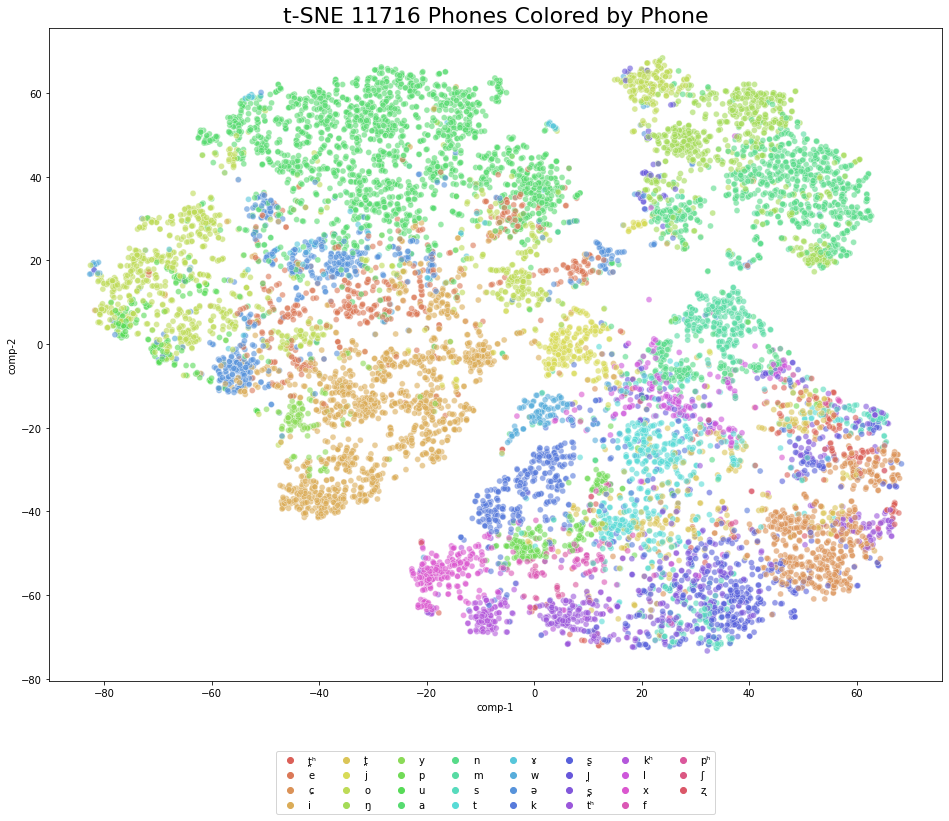

In [ ]:
############ 所有phone的分布 ############

df['phone'] = y['phone'].tolist()
phonelist = df.phone.tolist()

fig, ax = plt.subplots(figsize=(16,12))
ax.set_title('t-SNE 11716 Phones Colored by Phone',fontsize=22)

sns.scatterplot(x="comp-1", y="comp-2", 
                hue = phonelist,
                palette = sns.color_palette("hls", len(set(phonelist))),
                alpha = 0.6,
                data = df)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)

#for i,row in df.iterrows():
 #   ax.annotate(row['phone'], 
  #          (row['comp-1'],row['comp-2']),
   #         textcoords='offset points',
    #        xytext=(8,4),
     #       ha='right',
      #      fontsize=7)


plt.show

只畫有對應/ho/的phones

In [ ]:
# 找出有對應ho的row index
row_idlist = []

for i,r in y.iterrows():
  if r['has_match']=='yes':
    row_idlist.append(i)

len(row_idlist)

470

In [ ]:
row_idlist[:3]

[18, 19, 20]

In [ ]:
'''with open('./data/filter_idlist.pkl', 'wb') as f:
  pickle.dump(row_idlist, f)

In [ ]:
# 篩出對應id在df 和在y的row
filter_df  = df.loc[row_idlist]
filter_y  = y.loc[y['has_match']=='yes']

filter_df.shape, filter_y.shape

((470, 2), (470, 7))

In [ ]:
filter_df[:5]

,comp-1,comp-2
18,27.941244,29.770956
19,-30.644875,-5.742225
20,57.967636,-22.112434
21,-6.503804,41.149845
36,-4.906386,-52.821701


In [ ]:
filter_y[:5]

,offset_id,offset_s,phone,filename,has_match,match_ho_id,ho_datalist
18,439,13.17,n,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,..."
19,446,13.38,y,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,..."
20,450,13.50,ɕ,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,..."
21,452,13.56,a,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,..."
36,707,21.21,p,劉櫂豪-127903,yes,1,"[劉櫂豪-127903, 21.15613, 21.80866, h_oN_f, 1, f,..."


In [ ]:
# 把ho_datalist 拆成獨立df
cols = ['mark','nasal','position','func_1','func_2']
ho_data_df = pd.DataFrame(columns=cols)

for ho_datalist in filter_y['ho_datalist'].tolist():
  arr = ho_datalist[3:8]
  t = pd.DataFrame(arr.reshape(1,-1), columns=cols)
  ho_data_df = pd.concat([ho_data_df,t], ignore_index=True)

# 再把ho_data_df拼回 filter_y
cols13 = ['origin_idx']+filter_y.columns.tolist()+cols

filter_y = pd.concat([filter_y.reset_index(),ho_data_df], ignore_index=True, axis=1)
filter_y.columns = cols13

filter_y

,origin_idx,offset_id,offset_s,phone,filename,has_match,match_ho_id,ho_datalist,mark,nasal,position,func_1,func_2
0,18,439,13.17,n,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...",h_oN_f,1,f,b,b
1,19,446,13.38,y,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...",h_oN_f,1,f,b,b
2,20,450,13.50,ɕ,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...",h_oN_f,1,f,b,b
3,21,452,13.56,a,劉櫂豪-127903,yes,0,"[劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...",h_oN_f,1,f,b,b
4,36,707,21.21,p,劉櫂豪-127903,yes,1,"[劉櫂豪-127903, 21.15613, 21.80866, h_oN_f, 1, f,...",h_oN_f,1,f,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1850,15035,451.05,y,陳瑩-128068,yes,17,"[陳瑩-128068, 450.9023, 451.511, h_oN_f, 1, f, b...",h_oN_f,1,f,b,b
466,1851,15040,451.20,ɕ,陳瑩-128068,yes,17,"[陳瑩-128068, 450.9023, 451.511, h_oN_f, 1, f, b...",h_oN_f,1,f,b,b
467,1852,15043,451.29,i,陳瑩-128068,yes,17,"[陳瑩-128068, 450.9023, 451.511, h_oN_f, 1, f, b...",h_oN_f,1,f,b,b
468,1853,15046,451.38,x,陳瑩-128068,yes,17,"[陳瑩-128068, 450.9023, 451.511, h_oN_f, 1, f, b...",h_oN_f,1,f,b,b


In [ ]:
#filter_df.to_pickle('./data/filter_df.pkl')
#filter_y.to_pickle('./data/filter_y.pkl')

讀取存好的filter_df, filter_y

In [ ]:
filter_df = pd.read_pickle('./data/filter_df.pkl')
filter_y = pd.read_pickle('./data/filter_y.pkl')

filter_df.shape, filter_y.shape

In [ ]:
filter_df[:2],filter_y[:2]

(       comp-1     comp-2
 18  27.941244  29.770956
 19 -30.644875  -5.742225,
    origin_idx  offset_id  offset_s phone    filename has_match match_ho_id  \
 0          18        439     13.17     n  劉櫂豪-127903       yes           0   
 1          19        446     13.38     y  劉櫂豪-127903       yes           0   
 
                                          ho_datalist    mark nasal position  \
 0  [劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...  h_oN_f     1        f   
 1  [劉櫂豪-127903, 13.10793, 13.84637, h_oN_f, 1, f,...  h_oN_f     1        f   
 
   func_1 func_2  
 0      b      b  
 1      b      b  )

<function matplotlib.pyplot.show>

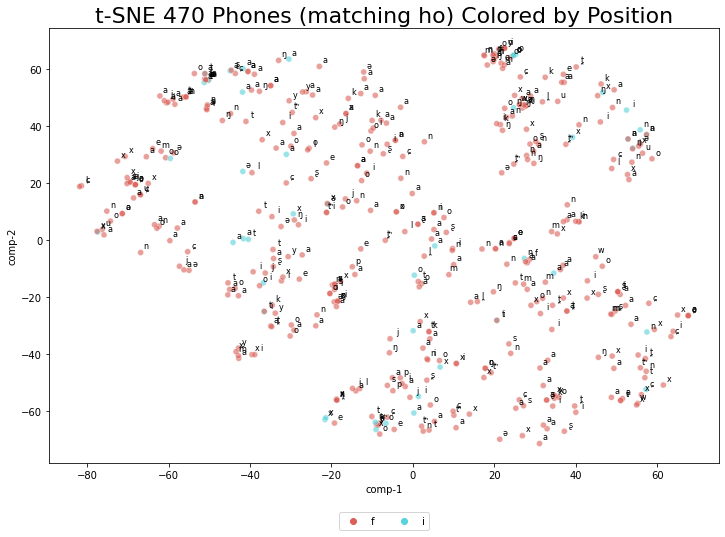

In [ ]:
############ POSITION ############

filter_df["phone"] = filter_y['phone'].tolist()
filter_df["position"] = filter_y['position'].tolist()

phonelist = filter_df.phone.tolist()
len_of_color = len(set(filter_df.position.tolist()))
list_of_hue = filter_df.position.tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 470 Phones (matching ho) Colored by Position',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.6,
                data=filter_df)

for i,row in filter_df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=8)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

<function matplotlib.pyplot.show>

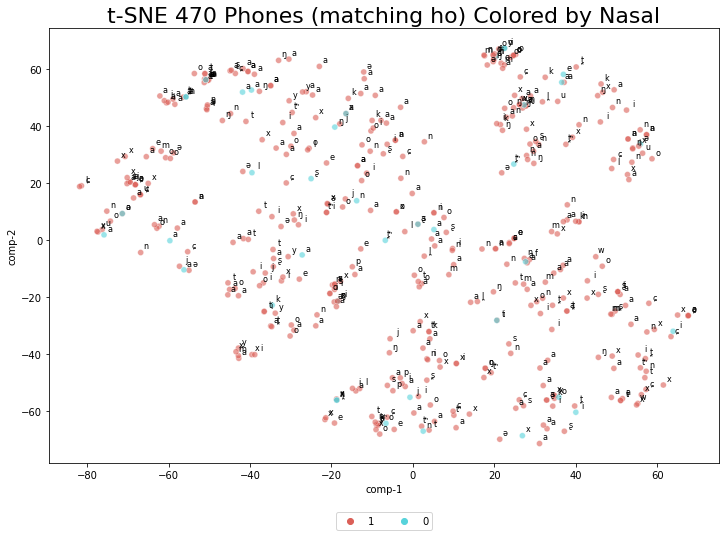

In [ ]:
############ NASAL ############

filter_df["phone"] = filter_y['phone'].tolist()
filter_df["nasal"] = filter_y['nasal'].tolist()

phonelist = filter_df.phone.tolist()
len_of_color = len(set(filter_df.nasal.tolist()))
list_of_hue = filter_df.nasal.tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 470 Phones (matching ho) Colored by Nasal',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.6,
                data=filter_df)

for i,row in filter_df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=8)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

In [ ]:
# func_1 func_2的一致性
n = 0
for i,r in filter_y.iterrows():
  if r['func_1'] == r['func_2']:
    n+=1

n/470

0.8212765957446808

<function matplotlib.pyplot.show>

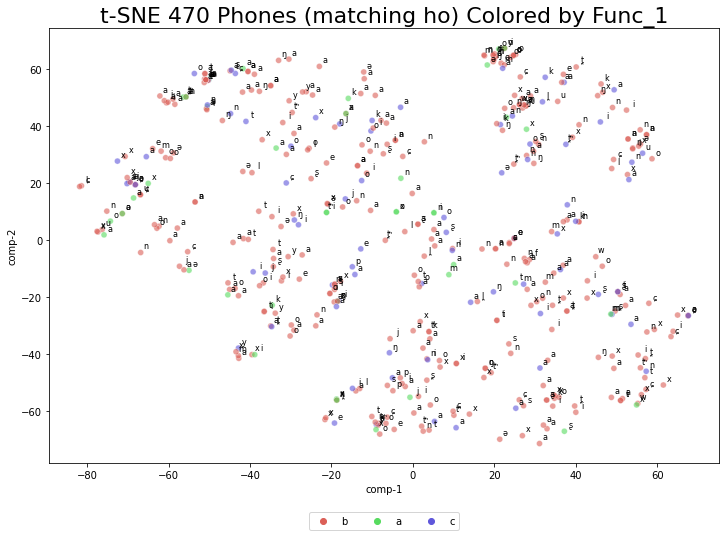

In [ ]:
############ FUNC_111 ############

filter_df["phone"] = filter_y['phone'].tolist()
phonelist = filter_df.phone.tolist()

len_of_color = len(set(filter_y["func_1"].tolist()))
list_of_hue = filter_y["func_1"].tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 470 Phones (matching ho) Colored by Func_1',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.6,
                data=filter_df)

for i,row in filter_df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=8)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

<function matplotlib.pyplot.show>

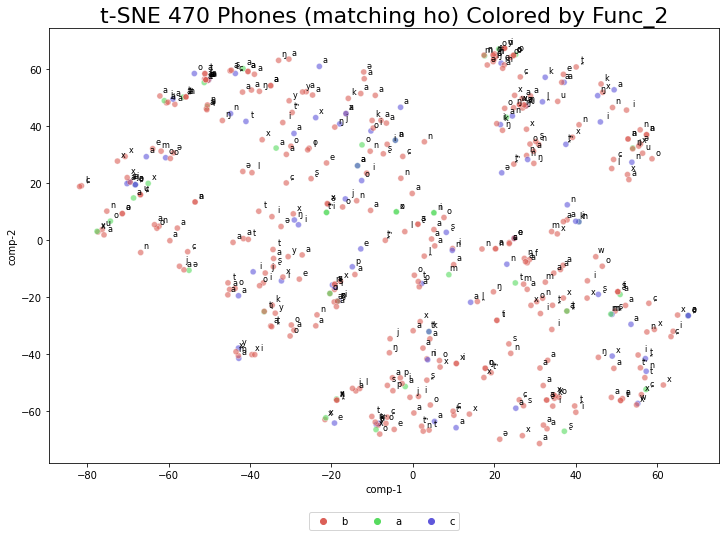

In [ ]:
############ FUNC_222 ############

filter_df["phone"] = filter_y['phone'].tolist()
phonelist = filter_df.phone.tolist()

list_of_hue = filter_y["func_2"].tolist()
len_of_color = len(set(filter_y["func_2"].tolist()))


fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 470 Phones (matching ho) Colored by Func_2',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.6,
                data=filter_df)

for i,row in filter_df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=8)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

##### SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle


In [ ]:
#filter_new_emit_all.to_pickle('./data/filter_new_emit_all.pkl')

In [ ]:
filter_new_emit_all = pd.read_pickle('./data/filter_new_emit_all.pkl')

In [ ]:
filter_y = pd.read_pickle('./data/filter_y.pkl')

In [ ]:
# build embedding matrix 

serie = filter_new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index = filter_new_emit_all['phone'])

vec_matrix.shape

(470, 640)

In [ ]:
filter_y.shape

(470, 13)

In [ ]:
############# POSITION ############# 

x = vec_matrix
y = filter_y['position'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
for i in [x, x_train, x_test, y, y_train, y_test]:
  print(i.shape)

(470, 640)
(329, 640)
(141, 640)
(470,)
(329,)
(141,)


In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Total 470 phones matching ho')
print('x: bilstm 640, y: Position')
print('x_train:{}, x_test:{}, 30%'.format(x_train.shape, x_test.shape),'\n')

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Total 470 phones matching ho
x: bilstm 640, y: Position
x_train:(329, 640), x_test:(141, 640), 30% 

Accuracy: 0.9219858156028369
              precision    recall  f1-score   support

           f       0.95      0.96      0.96       126
           i       0.64      0.60      0.62        15

    accuracy                           0.92       141
   macro avg       0.80      0.78      0.79       141
weighted avg       0.92      0.92      0.92       141



In [ ]:
############# NASAL ############# 

x = vec_matrix
y = filter_y['nasal'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
for i in [x, x_train, x_test, y, y_train, y_test]:
  print(i.shape)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Total 470 phones matching ho')
print('x: bilstm 640, y: Nasal')
print('x_train:{}, x_test:{}, 30%'.format(x_train.shape, x_test.shape),'\n')

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Total 470 phones matching ho
x: bilstm 640, y: Nasal
x_train:(329, 640), x_test:(141, 640), 30% 

Accuracy: 0.8794326241134752
              precision    recall  f1-score   support

           0       0.29      0.14      0.19        14
           1       0.91      0.96      0.93       127

    accuracy                           0.88       141
   macro avg       0.60      0.55      0.56       141
weighted avg       0.85      0.88      0.86       141



In [ ]:
############# FUNC_1 ############# 

x = vec_matrix
y = filter_y['func_1'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
for i in [x, x_train, x_test, y, y_train, y_test]:
  print(i.shape)

(470, 640)
(329, 640)
(141, 640)
(470,)
(329,)
(141,)


In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Total 470 phones matching ho')
print('x: bilstm 640, y: Function 1')
print('x_train:{}, x_test:{}, 30%'.format(x_train.shape, x_test.shape),'\n')

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Total 470 phones matching ho
x: bilstm 640, y: Function 1
x_train:(329, 640), x_test:(141, 640), 30% 

Accuracy: 0.7446808510638298
              precision    recall  f1-score   support

           a       0.47      0.41      0.44        17
           b       0.84      0.84      0.84       103
           c       0.48      0.52      0.50        21

    accuracy                           0.74       141
   macro avg       0.60      0.59      0.59       141
weighted avg       0.74      0.74      0.74       141



In [ ]:
############# MARK ############# 

x = vec_matrix
y = filter_y['mark'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
for i in [x, x_train, x_test, y, y_train, y_test]:
  print(i.shape)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Total 470 phones matching ho')
print('x: bilstm 640, y: ho_type')
print('x_train:{}, x_test:{}, 30%'.format(x_train.shape, x_test.shape),'\n')

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Total 470 phones matching ho
x: bilstm 640, y: ho_type
x_train:(329, 640), x_test:(141, 640), 30% 

Accuracy: 0.7801418439716312
              precision    recall  f1-score   support

      h_oN_f       0.82      0.89      0.85        99
      h_oN_i       0.69      0.60      0.64        15
       h_o_f       0.00      0.00      0.00         4
        oN_f       0.69      0.75      0.72        12
         o_f       0.80      0.40      0.53        10
        uN_f       0.00      0.00      0.00         1

    accuracy                           0.78       141
   macro avg       0.50      0.44      0.46       141
weighted avg       0.77      0.78      0.77       141



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
############# FUNC_222222222 ############# 

x = vec_matrix
y = filter_y['func_2'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
for i in [x, x_train, x_test, y, y_train, y_test]:
  print(i.shape)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Total 470 phones matching ho')
print('x: bilstm 640, y: Function 2')
print('x_train:{}, x_test:{}, 30%'.format(x_train.shape, x_test.shape),'\n')

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Total 470 phones matching ho
x: bilstm 640, y: Function 2
x_train:(329, 640), x_test:(141, 640), 30% 

Accuracy: 0.6808510638297872
              precision    recall  f1-score   support

           a       0.24      0.29      0.26        14
           b       0.81      0.79      0.80       106
           c       0.40      0.38      0.39        21

    accuracy                           0.68       141
   macro avg       0.48      0.49      0.48       141
weighted avg       0.69      0.68      0.69       141



### **Past Visualization**

#### new_emit_all (pca) 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

def plotPCAvariance(pca, PCA_components):
  # plot 變異數
  PC = range(1, pca.n_components_+1)
  plt.bar(PC, pca.explained_variance_ratio_, color='green')
  plt.ylabel('Variance %')
  plt.xticks(PC)

In [ ]:
# build embedding matrix 
# for new_emit_all

serie = new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index=new_emit_all['phone'])

vec_matrix.shape, vec_matrix.head()

((5644, 640),
             0         1         2         3         4         5         6    \
 phone                                                                         
 t̪ʰ    0.008234  0.036981  0.051182  0.029818  0.006605  0.285853 -0.010690   
 e     -0.093031 -0.240933  0.037781  0.111208  0.031017  0.043530 -0.174649   
 ɕ      0.025510  0.033120 -0.142324  0.202628  0.037465  0.030238 -0.242430   
 i     -0.395540 -0.158916 -0.187352  0.105276  0.094086  0.190184 -0.473290   
 t̪     0.270824  0.055123  0.009219  0.076463  0.009573 -0.134660 -0.293644   
 
             7         8         9    ...       630       631       632  \
 phone                                ...                                 
 t̪ʰ   -0.060136 -0.143635  0.629929  ... -0.318124 -0.222207  0.176918   
 e     -0.321202 -0.227639  0.590029  ...  0.254554 -0.128188 -0.099489   
 ɕ     -0.221756 -0.127592  0.574045  ...  0.079077 -0.682435  0.647834   
 i     -0.534186 -0.395885  0.785063  ...  0.4601

In [ ]:
# prepare data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = new_emit_all[[ 'phone', 'has_match']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [ ]:
for data in [x_train, x_test, y_train, y_test]:
  print(data.shape)

(4515, 640)
(1129, 640)
(4515, 2)
(1129, 2)


In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(x_train)

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

([<matplotlib.axis.XTick at 0x7f9b62cc69d0>,
 <a list of 8 Text major ticklabel objects>)

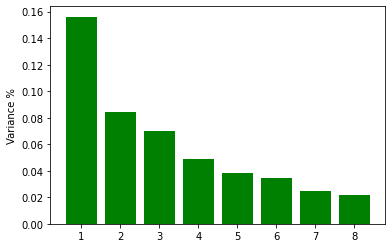

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot 變異數
PC = range(1, pca.n_components_+1)

plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.ylabel('Variance %')
plt.xticks(PC)

In [ ]:
PCA_components.shape, y_train.shape

((4515, 8), (4515, 2))

<function matplotlib.pyplot.show>

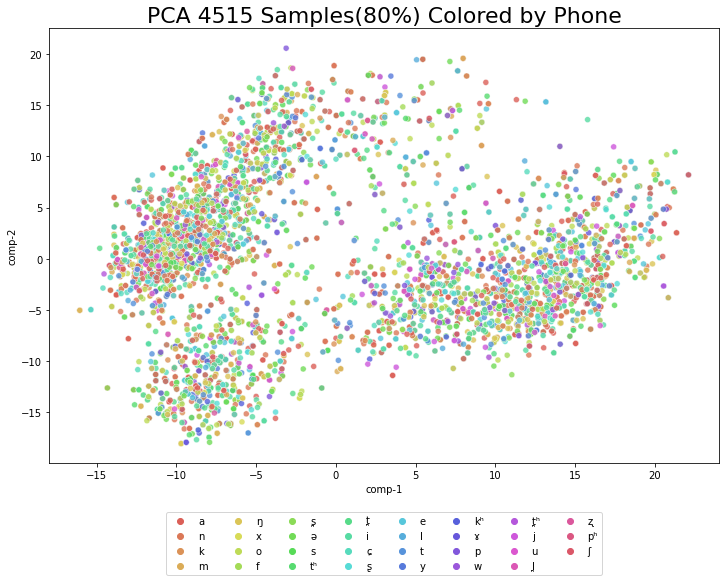

In [ ]:
# 4515 sample phones 
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame()
df["phone"] = y_train['phone']
df["comp-1"] = PCA_components[0]
df["comp-2"] = PCA_components[1]

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('PCA 4515 Samples(80%) Colored by Phone',fontsize=22)

sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.phone.tolist(),
                palette = sns.color_palette("hls", len(set(df.phone.tolist()))),
                alpha = 0.8,
                data=df)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)

#for i,row in df.iterrows():
 #   ax.annotate(row['phone'], 
  #              (row['comp-1'],row['comp-2']),
   #             textcoords='offset points',
    #            xytext=(8,4),
     #           ha='right',
      #          fontsize=10)


plt.show

#### new_emit_all (t-SNE)

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [ ]:
# build embedding matrix 
# for new_emit_all

serie = new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index=new_emit_all['phone'])

vec_matrix.shape

(5644, 640)

In [ ]:
# prepare data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = new_emit_all[[ 'phone', 'has_match']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 40)

In [ ]:
for data in [x_train, x_test, y_train, y_test]:
  print(data.shape)

(3386, 640)
(2258, 640)
(3386, 2)
(2258, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3386 samples in 0.002s...
[t-SNE] Computed neighbors for 3386 samples in 0.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3386
[t-SNE] Computed conditional probabilities for sample 2000 / 3386
[t-SNE] Computed conditional probabilities for sample 3000 / 3386
[t-SNE] Computed conditional probabilities for sample 3386 / 3386
[t-SNE] Mean sigma: 2.501960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.030960
[t-SNE] KL divergence after 1000 iterations: 1.205915


<function matplotlib.pyplot.show>

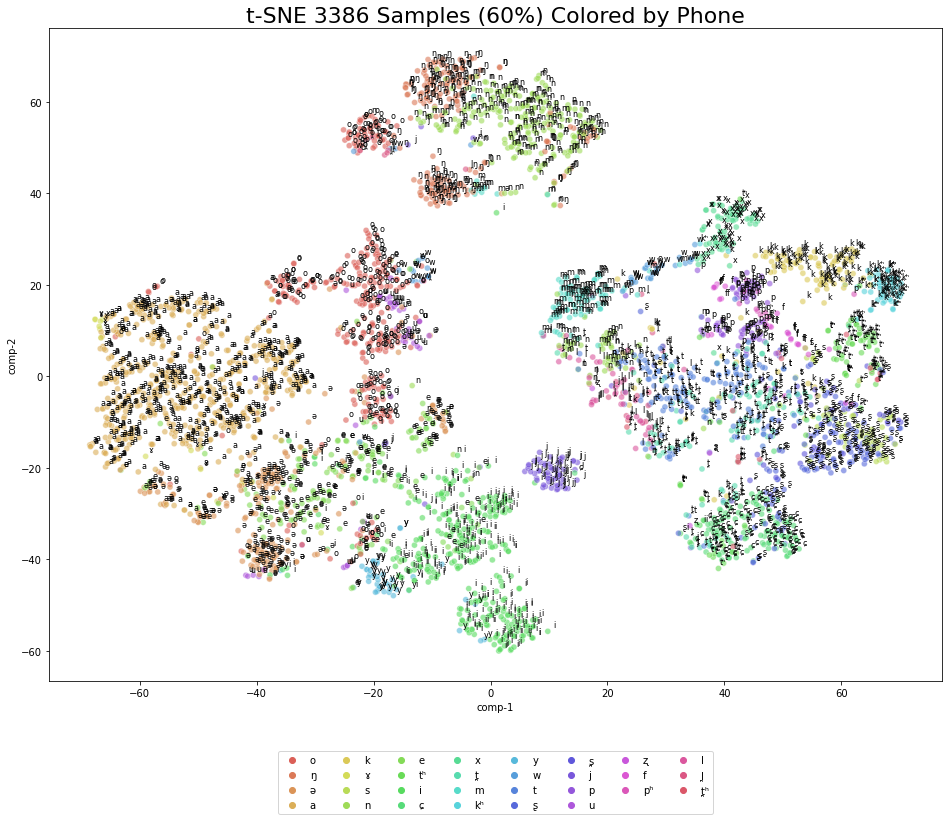

In [ ]:
###### 3386 Phones Colored by Phone ######
tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(x_train)
df = pd.DataFrame()
df["y"] = y_train['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig, ax = plt.subplots(figsize=(16,12))
ax.set_title('t-SNE 3386 Samples (60%) Colored by Phone',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.y.tolist(),
                palette = sns.color_palette("hls", len(set(df.y.tolist()))),
                alpha = 0.6,
                data=df)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)

for i,row in df.iterrows():
    ax.annotate(row['y'], 
            (row['comp-1'],row['comp-2']),
            textcoords='offset points',
            xytext=(8,4),
            ha='right',
            fontsize=8)


plt.show

##### SVM

In [ ]:
# build embedding matrix 

serie = new_emit_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index = new_emit_all['phone'])

vec_matrix.shape

(5644, 640)

In [ ]:
# prepare data PHONEEEEEe
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = new_emit_all['phone']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [ ]:
# prepare data has_match
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = new_emit_all['has_match']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [ ]:
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(4515, 640)
(1129, 640)
(4515,)
(1129,)


In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9388839681133747
              precision    recall  f1-score   support

          no       0.96      0.98      0.97      1063
         yes       0.47      0.35      0.40        66

    accuracy                           0.94      1129
   macro avg       0.71      0.66      0.68      1129
weighted avg       0.93      0.94      0.93      1129



#### matched_df_all (pca)

In [ ]:
# build embedding matrix 


serie = matched_df_all['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index = matched_df_all['phone'])

vec_matrix.shape

In [ ]:
matched_df_all.drop('bilstm',axis=1).columns

Index(['offset_id', 'offset_s', 'phone', 'has_match', 'matched_ho',
       'new_start', 't_end', 'mark', 'nasalized', 'position', 'function',
       'function2', 'ho_annot_id'],
      dtype='object')

In [ ]:
'''# prepare data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = matched_df_all.drop('bilstm',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)'''

In [ ]:
vec_matrix.shape, matched_df_all.shape

((294, 640), (294, 14))

In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(vec_matrix)

pca = PCA(n_components=2)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

([<matplotlib.axis.XTick at 0x7f9b64d2cdd0>,
 <a list of 2 Text major ticklabel objects>)

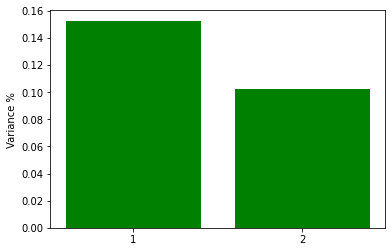

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot 變異數
PC = range(1, pca.n_components_+1)

plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.ylabel('Variance %')
plt.xticks(PC)

In [ ]:
PCA_components.shape, matched_df_all.shape

((294, 2), (294, 14))

<function matplotlib.pyplot.show>

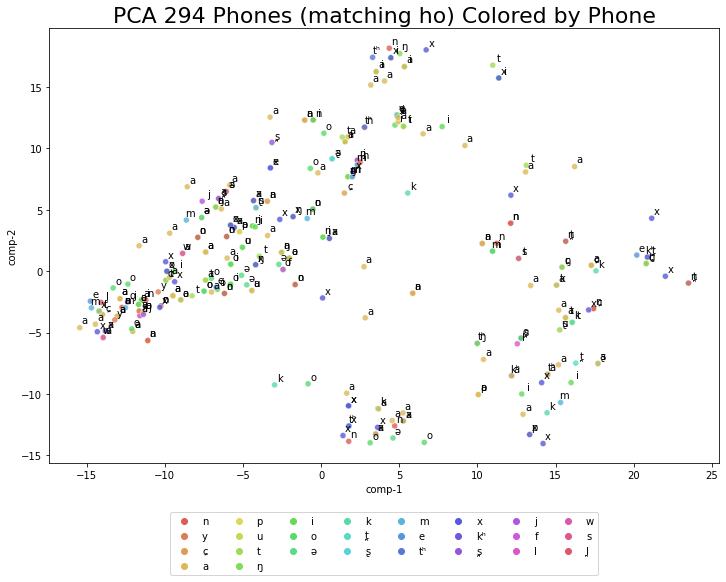

In [ ]:
# 294 sample phones 
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame()
df["y"] = matched_df_all['phone']
df["comp-1"] = PCA_components[0]
df["comp-2"] = PCA_components[1]

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('PCA 294 Phones (matching ho) Colored by Phone',fontsize=22)

sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.y.tolist(),
                palette = sns.color_palette("hls", len(set(df.y.tolist()))),
                alpha = 0.8,
                data=df)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)

for i,row in df.iterrows():
    ax.annotate(row['y'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)


plt.show

#### matched_df_all (t-SNE)

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 294 samples in 0.000s...
[t-SNE] Computed neighbors for 294 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 294 / 294
[t-SNE] Mean sigma: 3.457464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.003166
[t-SNE] KL divergence after 1000 iterations: 0.407223


<function matplotlib.pyplot.show>

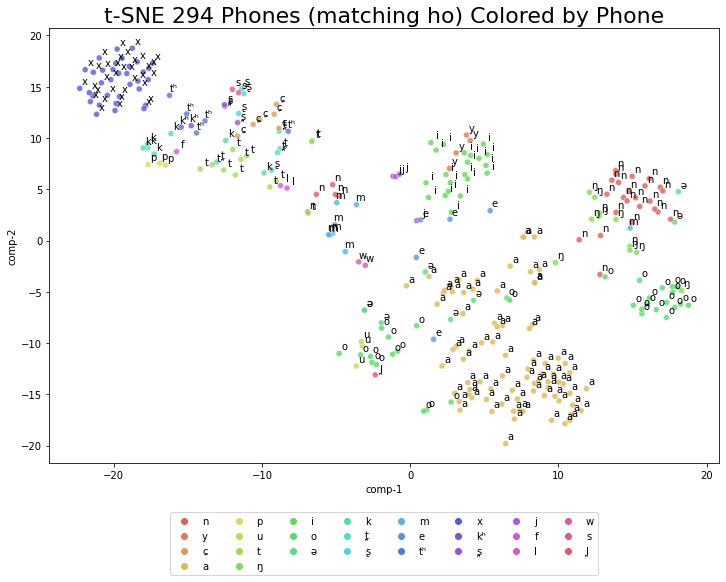

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["y"] = matched_df_all['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 294 Phones (matching ho) Colored by Phone',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.y.tolist(),
                palette = sns.color_palette("hls", len(set(df.y.tolist()))),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['y'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

##### position & ho_type (t-SNE)

In [ ]:
matched_df_all.shape, vec_matrix.shape

((294, 14), (294, 640))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 294 samples in 0.001s...
[t-SNE] Computed neighbors for 294 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 294 / 294
[t-SNE] Mean sigma: 3.457464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.003166
[t-SNE] KL divergence after 1000 iterations: 0.407223


<function matplotlib.pyplot.show>

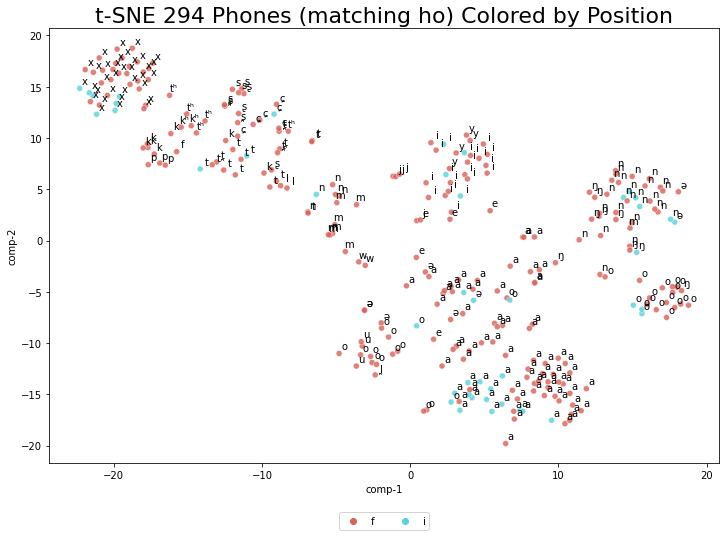

In [ ]:
############ POSITION

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["phone"] = matched_df_all['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["position"] = matched_df_all['position']

len_of_color = len(set(df.position.tolist()))
list_of_hue = df.position.tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 294 Phones (matching ho) Colored by Position',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 294 samples in 0.000s...
[t-SNE] Computed neighbors for 294 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 294 / 294
[t-SNE] Mean sigma: 3.457464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.003166
[t-SNE] KL divergence after 1000 iterations: 0.407223


<function matplotlib.pyplot.show>

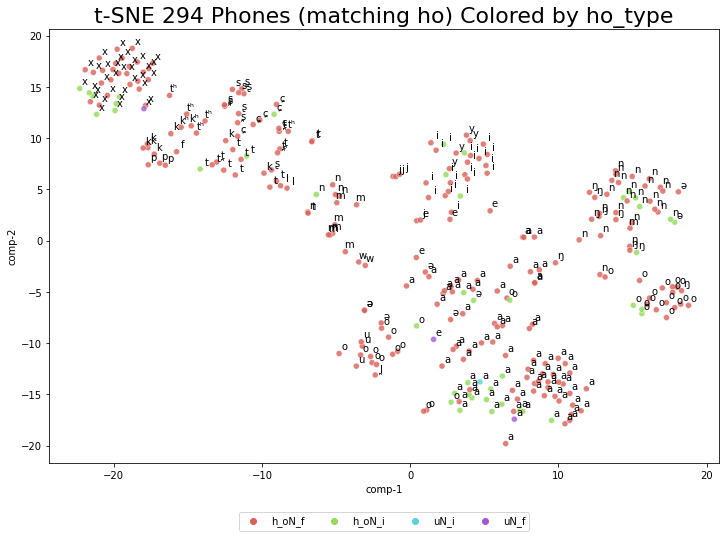

In [ ]:
############ ho_type

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["phone"] = matched_df_all['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["ho_type"] = matched_df_all['mark']

len_of_color = len(set(df.ho_type.tolist()))
list_of_hue = df.ho_type.tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 294 Phones (matching ho) Colored by ho_type',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

##### func_df (135) (t-SNE)

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [ ]:
func_df = matched_df_all.loc[matched_df_all['function2'].isin(['a','b','c'])]
print(func_df.shape)
func_df[:2]

(135, 14)


,offset_id,offset_s,bilstm,phone,has_match,matched_ho,new_start,t_end,mark,nasalized,position,function,function2,ho_annot_id
0,439,13.17,"[0.2491797, 0.037070695, 0.264583, 0.14962235,...",n,yes,0,13.10793,13.84637,h_oN_f,1,f,b,b,0
1,446,13.38,"[-0.3663353, 0.07005582, -0.0034855523, 0.0901...",y,yes,0,13.10793,13.84637,h_oN_f,1,f,b,b,0


In [ ]:
# build embedding matrix 

serie = func_df['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index = func_df['phone'])

vec_matrix.shape, vec_matrix[2]

((135, 640), phone
 n     0.264583
 y    -0.003486
 ɕ    -0.032171
 a    -0.137671
 p    -0.082444
         ...   
 n     0.428815
 i     0.074613
 n     0.654468
 s̪   -0.019898
 n     0.403194
 Name: 2, Length: 135, dtype: float32)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.000s...
[t-SNE] Computed neighbors for 135 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 4.138872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.282471
[t-SNE] KL divergence after 1000 iterations: 0.283959


<function matplotlib.pyplot.show>

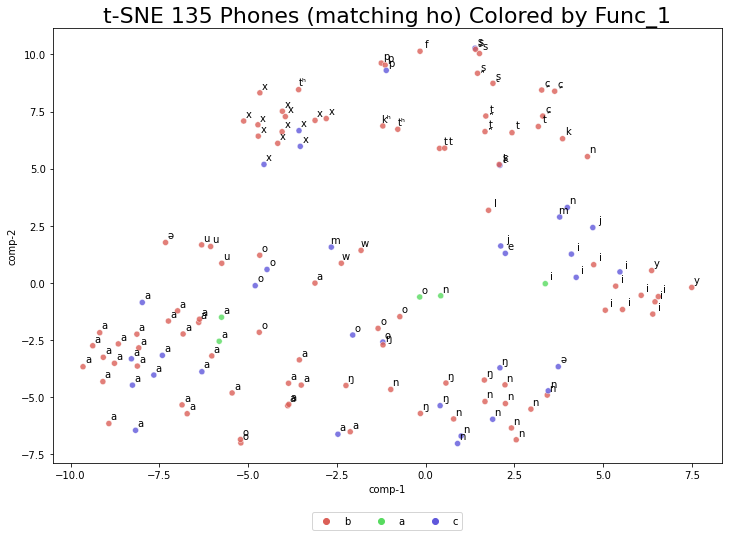

In [ ]:
############ FUNCTION 11111111111

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["phone"] = func_df['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["func_1"] = func_df['function']
df["func_2"] = func_df['function2']

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 135 Phones (matching ho) Colored by Func_1',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.func_1.tolist(),
                palette = sns.color_palette("hls", len(set(df.func_1.tolist()))),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.000s...
[t-SNE] Computed neighbors for 135 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 4.138872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.282471
[t-SNE] KL divergence after 1000 iterations: 0.283959


<function matplotlib.pyplot.show>

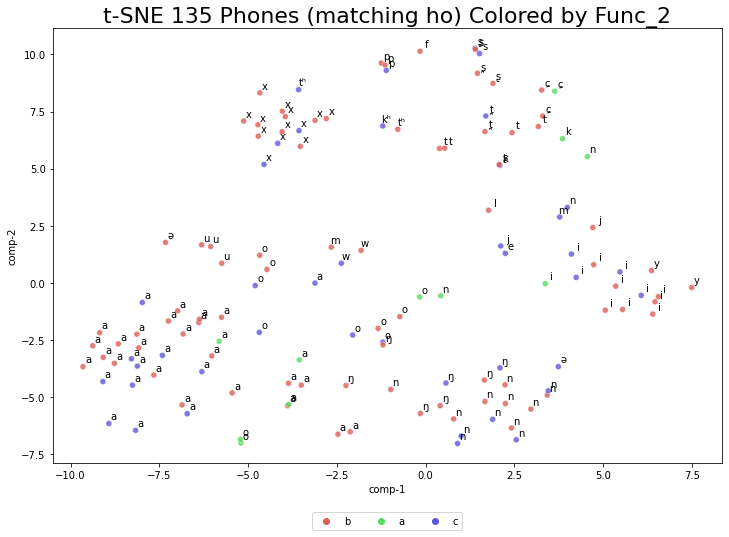

In [ ]:
############ FUNCTION 222222222

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["phone"] = func_df['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["func_1"] = func_df['function']
df["func_2"] = func_df['function2']

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 135 Phones (matching ho) Colored by Func_2',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue=df.func_2.tolist(),
                palette = sns.color_palette("hls", len(set(df.func_2.tolist()))),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

In [ ]:
is_same = []
for i,r in func_df.iterrows():
  if r['function']==r['function2']:
    is_same.append('same annotation')
  else:
    is_same.append('different annotation')

In [ ]:
func_df['is_same'] = is_same
func_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.000s...
[t-SNE] Computed neighbors for 135 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 4.138872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.282471
[t-SNE] KL divergence after 1000 iterations: 0.283959


<function matplotlib.pyplot.show>

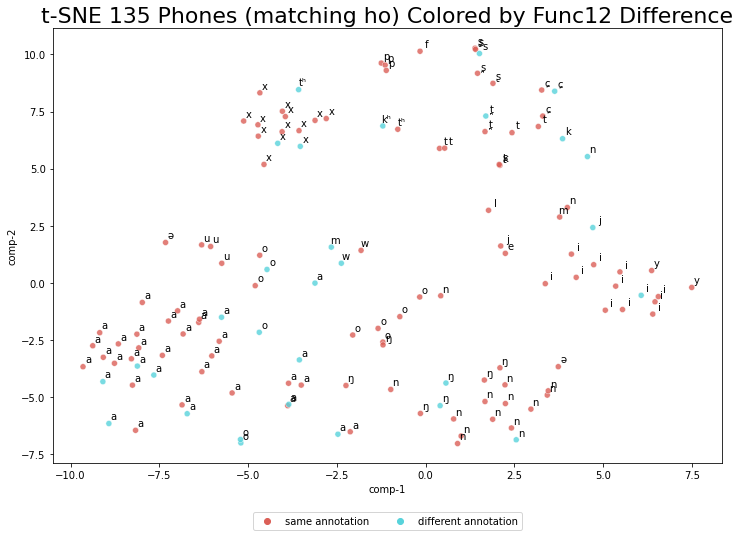

In [ ]:
############ FUNC Difference

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(vec_matrix)
df = pd.DataFrame()
df["phone"] = func_df['phone']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["is_same"] = func_df['is_same']

len_of_color = len(set(df.is_same.tolist()))
list_of_hue = df.is_same.tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('t-SNE 135 Phones (matching ho) Colored by Func12 Difference',fontsize=22)
sns.scatterplot(x="comp-1", y="comp-2", 
                hue = list_of_hue,
                palette = sns.color_palette("hls", len_of_color),
                alpha = 0.8,
                data=df)

for i,row in df.iterrows():
    ax.annotate(row['phone'], 
                (row['comp-1'],row['comp-2']),
                textcoords='offset points',
                xytext=(8,4),
                ha='right',
                fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=8)
plt.show

##### SVM

In [ ]:
# build embedding matrix 

serie = func_df['bilstm']
vec_matrix = pd.DataFrame(serie.values.tolist(), index = func_df['phone'])

vec_matrix.shape

(135, 640)

In [ ]:
# prepare data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

x = vec_matrix
y = func_df['function']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [ ]:
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(108, 640)
(27, 640)
(108,)
(27,)


In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           a       0.00      0.00      0.00         1
           b       0.79      0.79      0.79        19
           c       0.57      0.57      0.57         7

    accuracy                           0.70        27
   macro avg       0.45      0.45      0.45        27
weighted avg       0.70      0.70      0.70        27



## 7/28 TextGrid to GoogleSheet

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme')
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/Shareddrives/LOPE/國際合作/Redhen/2022.Summer.intern/wav2phoneme'

process TG
1. 劉櫂豪-127903
2. 陳椒華-127940
3. 黃國書-127909
4. 許淑華-127889
5. 趙正宇-127849
6. 陳瑩-128068


In [ ]:
!pip install textgrid

import textgrid
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read .TextGrid
tg_1 = textgrid.TextGrid.fromFile('./data/劉櫂豪-127903.TextGrid')
tg_2 = textgrid.TextGrid.fromFile('./data/陳椒華-127940.TextGrid')

In [ ]:
# read .TextGrid
tg_3 = textgrid.TextGrid.fromFile('./data/黃國書-127909.TextGrid')
tg_4 = textgrid.TextGrid.fromFile('./data/許淑華-127889.TextGrid')

In [ ]:
# read .TextGrid
tg_5 = textgrid.TextGrid.fromFile('./data/趙正宇-127849.TextGrid')
tg_6 = textgrid.TextGrid.fromFile('./data/陳瑩-128068.TextGrid')

In [ ]:
def buildTierDF(filename, tg, tier_id):
  for tier in tg.tiers:
    print(tier.name, len(tier.intervals))
  
  # Read tier /ho/
  marklist = []

  for i in range(len(tg[tier_id])):
    temp = ''
    one = tg[tier_id][i]
    data_of_one = [filename, one.minTime, one.maxTime,  one.mark]
    marklist.append(data_of_one)

  df = pd.DataFrame(marklist,columns=['filename','t_start','t_end','mark'])
  return df

In [ ]:
import re

def tierDF2hoDF(tier_df):
  # get row_id that has mark
  idlist = []
  for i,r in tier_df.iterrows():
    if len(r['mark'])>1:
      idlist.append(i)

  ho_df = tier_df.iloc[idlist]

  # build feature columns
  nasalized = []
  position = []

  for i,r in ho_df.iterrows():
    mark = r['mark']
    print(mark)
    if 'N' in mark:
      nasalized.append(1)
    else: 
      nasalized.append(0)
    if 'f' in mark:
      position.append('f')
    elif 'i' in mark:
      position.append('i')

  ho_df.loc[:,'nasalized'] = nasalized
  ho_df.loc[:,'position'] = position
  
  ho_df.loc[:,'func_1'] = [None]*len(ho_df)
  ho_df.loc[:,'func_2'] = [None]*len(ho_df)

  # add new start time
  new_start = []
  for i,r in ho_df.iterrows():
    old = r['t_start']
    new = old-0.5
    new_start.append(new)

  ho_df.loc[:,'new_start'] = new_start

  # change col order
  ho_df = ho_df[['filename','t_start','new_start','t_end','mark','nasalized','position','func_1','func_2']]

  return ho_df

In [ ]:
# process 
tier_df = buildTierDF('劉櫂豪-127903', tg_1, 0)
ho_df_1 = tierDF2hoDF(tier_df)

len(tg_1[0]), tier_df.shape, ho_df_1.shape

/ho/ 157
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
uN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_i
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
oN_i

h_oN_i
h_oN_i
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_f


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(157, (157, 4), (76, 9))

In [ ]:
ho_df_1.to_csv('./data/ho_df_劉櫂豪-127903.csv',encoding='utf-8',index=False)

In [ ]:
# process 
filename = '陳椒華-127940'
tier_df = buildTierDF(filename, tg_2, 0)
ho_df_2 = tierDF2hoDF(tier_df)

len(tg_2[0]), tier_df.shape, ho_df_2.shape

/ho/ 113
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_o_i
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
uN_f
h_oN_i


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(113, (113, 4), (53, 9))

In [ ]:
ho_df_2.to_csv('./data/ho_df_陳椒華-127940.csv',encoding='utf-8',index=False)


    劉櫂豪-127903
    陳椒華-127940
    黃國書-127909
    許淑華-127889
    趙正宇-127849
    陳瑩-128068


In [ ]:
# process 3
filename = '黃國書-127909'
tier_df = buildTierDF(filename, tg_3, 0)
ho_df_3 = tierDF2hoDF(tier_df)

len(tg_3[0]), tier_df.shape, ho_df_3.shape

/ho/ 36
h_oN_f
h_oN_f
uN_f
h_oN_f
h_oN_f
oN_f
oN_f
oN_f
oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
oN_f
oN_f
oN_f


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(36, (36, 4), (17, 9))

In [ ]:
ho_df_3.to_csv('./data/ho_df_黃國書-127909.csv',encoding='utf-8',index=False)

In [ ]:
# process 4
filename = '許淑華-127889'
tier_df = buildTierDF(filename, tg_4, 0)
ho_df_4 = tierDF2hoDF(tier_df)

len(tg_4[0]), tier_df.shape, ho_df_4.shape

/ho/ 161
oN_i
h_oN_f
h_oN_f
oN_f
oN_f
o_f
h_oN_f
h_o_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_o_f
h_o_f
h_oN_f
h_oN_f
o_f
h_oN_f
h_o_f
h_oN_f
h_o_f
h_oN_f
h_o_f
oN_f
oN_f
h_o_f
o_f
oN_f
o_i
o_i 
o_i 
o_i 
h_o_i 
h_o_f
h_o_i
h_oN_f
h_oN_i
h_o_f
h_o_i
h_oN_i
h_o_f
h_o_i
h_oN_i
h_oN_f
h_o_f
h_oN_i
h_oN_f
h_o_f
h_oN_f
h_oN_f
h_oN_f
oN_f
h_oN_f
h_oN_f
h_o_f
h_o_f
h_o_i
h_o_f
h_o_f
h_oN_i
oN_f
h_oN_i
h_o_f
h_oN_i
h_oN_i
h_o_i
h_o_f
o_i
h_o_i
h_o_i
h_o_i
h_o_i
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_i
h_oN_i
h_oN_f
h_oN_f
h_oN_f


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(161, (161, 4), (81, 9))

In [ ]:
ho_df_4.to_csv('./data/ho_df_許淑華-127889.csv',encoding='utf-8',index=False)

In [ ]:
# process 5
filename = '趙正宇-127849'
tier_df = buildTierDF(filename, tg_5, 0)
ho_df_5 = tierDF2hoDF(tier_df)

len(tg_5[0]), tier_df.shape, ho_df_5.shape

/ho/ 47
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
h_oN_f
o_f
oN_f
h_oN_f
h_o_f
h_o_i
uN_f
o_f
o_f
h_oN_f
h_o_f
h_o_f
h_o_i
h_oN_i
h_o_i


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(47, (47, 4), (23, 9))

In [ ]:
ho_df_5.to_csv('./data/ho_df_趙正宇-127849.csv',encoding='utf-8',index=False)

In [ ]:
# process 6
filename = '陳瑩-128068'
tier_df = buildTierDF(filename, tg_6, 0)
ho_df_6 = tierDF2hoDF(tier_df)

len(tg_6[0]), tier_df.shape, ho_df_6.shape

In [ ]:
ho_df_6.to_csv('./data/ho_df_陳瑩-128068.csv',encoding='utf-8',index=False)

## 7/20

 pca KMeans 一個.wav

In [ ]:
# run inference
emit_frames = recog.recognize('./train/27_陳椒華-127925.wav')

print(emit_frames)
print(len(emit_frames))

# emit frame indices and offset(in second)
emit_frames[0].offset_idx, emit_frames[0].offset_s

In [ ]:
import pandas as pd

# embedding matrix
cols = list(range(0,640))
vec_matrix = pd.DataFrame(columns=cols)

for i in range(len(emit_frames)):
  phone = emit_frames[i].phone_token
  new = pd.DataFrame(emit_frames[i].bilstm_h.reshape(1,-1), columns=cols, index=[phone])

  vec_matrix = pd.concat([vec_matrix,new])

In [ ]:
vec_matrix

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
tsʰ,0.177925,0.022033,-0.113631,-0.083038,0.004572,-0.000121,-0.055703,-0.079350,-0.033268,0.349106,...,-0.483963,-0.484225,0.485624,-0.277385,0.355142,-0.488802,-0.103043,0.398852,0.017780,-0.386892
o,-0.178337,-0.242559,-0.108396,0.029430,-0.096778,-0.254159,-0.249122,-0.194015,-0.022214,0.110670,...,0.094185,-0.149492,0.163423,-0.360264,0.141043,-0.265192,0.231084,-0.477321,-0.002434,0.256239
t͡ɕ,0.629016,0.068843,0.001875,0.159301,0.069568,0.126429,-0.125725,0.136069,-0.245979,0.412785,...,-0.223306,0.185283,0.382393,-0.557532,0.504401,-0.121459,-0.548593,0.190388,0.322867,0.784394
o,0.263678,-0.049363,-0.001352,0.156195,0.014098,-0.438491,-0.591560,-0.192089,-0.614969,0.025600,...,0.093452,-0.233311,0.119621,-0.126755,0.280317,0.086437,0.051064,-0.527217,-0.033183,0.607788
uə,0.547619,0.028364,0.441538,0.560096,-0.073938,-0.669064,-0.751662,0.669787,-0.127307,0.221901,...,-0.257986,-0.222542,0.141111,-0.104154,-0.240710,-0.301059,0.123780,-0.218227,-0.160312,0.389020
e,0.385140,-0.138395,0.078861,0.161989,0.195981,-0.237492,-0.389726,-0.287393,-0.455895,-0.109898,...,0.207002,0.012083,0.023417,-0.134856,0.256950,0.042067,-0.299801,-0.314566,0.172726,0.347595
b,0.142351,0.107853,0.009094,0.041294,0.301254,-0.122226,-0.159350,0.078671,-0.263856,-0.564575,...,-0.423405,-0.551019,0.031842,-0.502931,0.524015,0.119344,-0.399198,-0.279356,0.206483,0.516803
æ,0.284019,-0.219792,-0.081470,0.596984,0.536277,-0.247335,-0.346499,-0.079420,-0.687122,0.143181,...,0.134978,-0.408618,-0.591060,-0.243625,0.413292,0.065066,0.134089,-0.352785,-0.069293,0.526338
n,0.712527,0.063533,0.474881,0.538008,0.564101,-0.736126,-0.801181,-0.418247,0.193706,0.035183,...,-0.338585,-0.199981,-0.320671,-0.198721,0.065181,-0.447739,0.084281,0.033195,-0.347912,0.278742
d,0.332760,0.045568,0.001320,0.042034,0.146524,-0.165566,-0.154143,-0.122081,-0.268737,-0.342824,...,0.127062,-0.222483,0.064311,0.205316,0.313116,0.318336,-0.308115,-0.174522,0.482135,0.557861


In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(vec_matrix) 

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

([<matplotlib.axis.XTick at 0x7f7c915926d0>,
 <a list of 8 Text major ticklabel objects>)

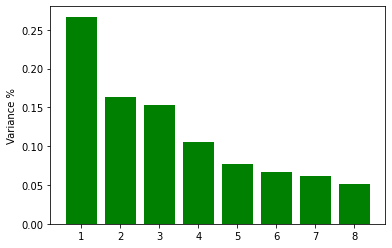

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot 變異數
PC = range(1, pca.n_components_+1)

plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.ylabel('Variance %')
plt.xticks(PC)

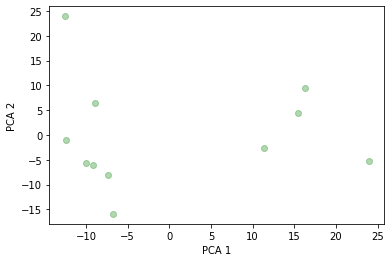

In [ ]:
# plot pca 數據

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
'KMeans model'
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  if __name__ == '__main__':


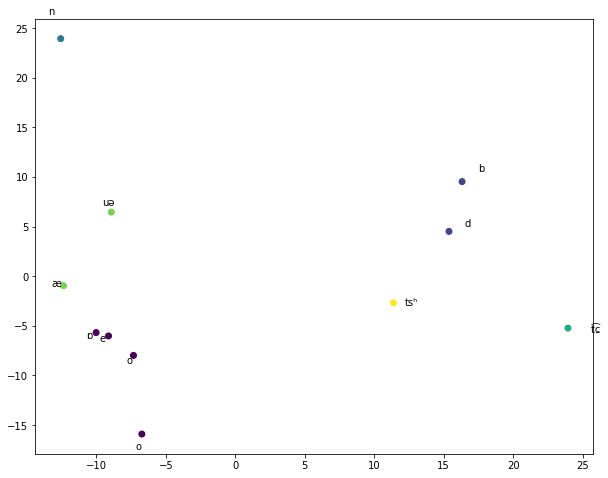

In [ ]:
# plot

plt.figure(figsize=(10, 8))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)

offset = 70
for i,row in PCA_components.iterrows():
  plt.annotate(vec_matrix.index[i], xy=(PCA_components.iloc[i,0],PCA_components.iloc[i,1]), 
               textcoords='offset points',)

plt.show()

** pca KMeans 陳椒華五個檔案**


* 48 一 齁 它的這個 爐心退出 齁
* 42 呃 輻射外洩 齁 是非常
* 30 池 齁 爆滿嘛齁 然後造成這
* 27 福島嘛齁 就是 燃料池
* 24 這個 核電廠齁 就是像

In [ ]:
# read audio segments 
pathlist = []
for file in os.listdir("./train"):
    if file.endswith(".wav"):
        pathlist.append("./train/"+file)

In [ ]:
pathlist

['./train/24_陳椒華-127925.wav',
 './train/27_陳椒華-127925.wav',
 './train/30_陳椒華-127925.wav',
 './train/42_陳椒華-127925.wav',
 './train/48_陳椒華-127925.wav']

In [ ]:
# get every sub-vec_matrix and concat
import pandas as pd

cols = list(range(0,230))
vec_matrix = pd.DataFrame(columns=cols)

for file in pathlist:
  emit_frames = recog.recognize(file)
  
  for i in range(len(emit_frames)):
    phone = emit_frames[i].phone_token
    one_phone_vec = pd.DataFrame(emit_frames[i].phone_logits.reshape(1,-1), columns=cols, index=[phone])

    vec_matrix = pd.concat([vec_matrix, one_phone_vec])

In [ ]:
vec_matrix.shape

(93, 230)

In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(vec_matrix) 

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

([<matplotlib.axis.XTick at 0x7f7c913ccbd0>,
 <a list of 8 Text major ticklabel objects>)

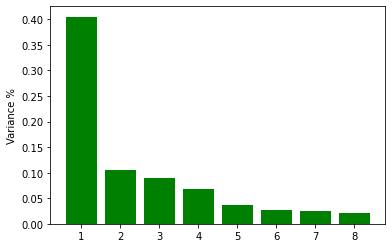

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot 變異數
PC = range(1, pca.n_components_+1)

plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.ylabel('Variance %')
plt.xticks(PC)

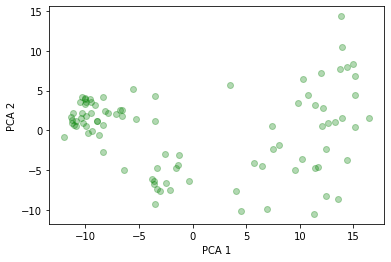

In [ ]:
# plot pca 數據

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
'KMeans model'
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  if __name__ == '__main__':


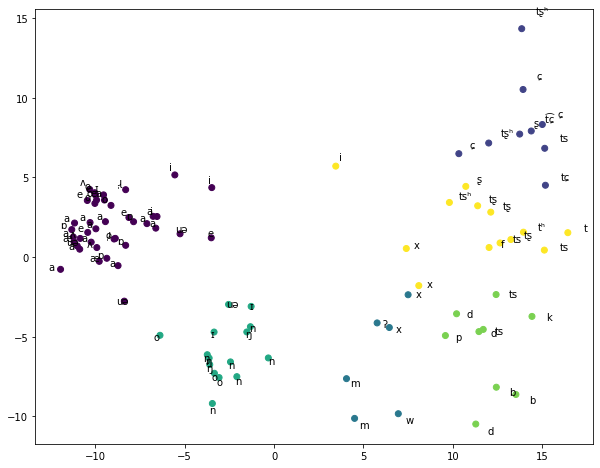

In [ ]:
# plot

plt.figure(figsize=(10, 8))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)

offset = 70
for i,row in PCA_components.iterrows():
  plt.annotate(vec_matrix.index[i], xy=(PCA_components.iloc[i,0],PCA_components.iloc[i,1]), 
               textcoords='offset points',)

plt.show()

**22 clips of 陳椒華-127925**


In [ ]:
# make metadata df
import pandas as pd

ho_df = pd.read_csv('./train/clip_ho_metadata.csv',encoding='utf-8',index_col=False)
ho_df

,filename,front_ho,mid_ho,end_ho,multiple_ho
0,18_陳椒華-127925.wav,0,1,0,0
1,21_陳椒華-127925.wav,1,0,0,0
2,24_陳椒華-127925.wav,0,1,0,0
3,27_陳椒華-127925.wav,1,0,0,0
4,30_陳椒華-127925.wav,1,1,0,1
5,42_陳椒華-127925.wav,0,1,0,0
6,45_陳椒華-127925.wav,1,0,0,0
7,48_陳椒華-127925.wav,1,0,1,1
8,60_陳椒華-127925.wav,1,0,0,0
9,63_陳椒華-127925.wav,0,1,0,0


In [ ]:

def plotPCAcomponents(pca, PCA_components, vec_matrix):
  # add col 'phone_token'
  PCA_components['phone_token'] = vec_matrix.index
  
  # set color by 'phone_token'
  plt.figure(figsize=(10, 8))
  plt.scatter(PCA_components[0], PCA_components[1], c=green, alpha=0.5) 
  for i,row in PCA_components.iterrows():
    plt.annotate(row['phone_token'], xy=(row[0],row[1]))

  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.show()

In [ ]:
def plotKMeans(model, PCA_components, vec_matrix):

  # add col 'phone_token'
  PCA_components['phone_token'] = vec_matrix.index
  
  # set color by 'phone_token'
  plt.figure(figsize=(10, 8))
  plt.scatter(PCA_components[0], PCA_components[1], alpha=0.5)
  
  for i,row in PCA_components.iterrows():
    plt.annotate(vec_matrix.index[i], xy=(PCA_components.iloc[i,0],PCA_components.iloc[i,1]))

  plt.show()

**pca color by phone**

In [ ]:
from allosaurus.app import read_recognizer

# load model
recog = read_recognizer()

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


downloading model  latest
from:  https://github.com/xinjli/allosaurus/releases/download/v1.0/latest.tar.gz
to:    /usr/local/lib/python3.7/dist-packages/allosaurus/pretrained
please wait...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

def plotPCAvariance(pca, PCA_components):
  # plot 變異數
  PC = range(1, pca.n_components_+1)
  plt.bar(PC, pca.explained_variance_ratio_, color='green')
  plt.ylabel('Variance %')
  plt.xticks(PC)


In [ ]:
frontlist = []
for i,r in ho_df.iterrows():
  if r['front_ho']==1:
    frontlist.append(r['filename'])

len(frontlist)

14

In [ ]:
# build front_vec_matrix
import pandas as pd

cols = list(range(0,640))
front_vec_matrix = pd.DataFrame(columns=cols)

for filename in frontlist:
  emit_frames = recog.recognize('./train/'+filename)
  
  for i in range(len(emit_frames)):
    phone = emit_frames[i].phone_token
    one_phone_vec = pd.DataFrame(emit_frames[i].bilstm_h.reshape(1,-1), columns=cols, index=[phone])

    front_vec_matrix = pd.concat([front_vec_matrix, one_phone_vec])

In [ ]:
front_vec_matrix.shape

(340, 640)

In [ ]:
len(set(front_vec_matrix.index))
phones340 = front_vec_matrix.index

In [ ]:
front_vec_matrix['phone_token']=phones340

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(front_vec_matrix, random_state=999, train_size=0.8)

In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(train_data.drop(['phone_token'], axis=1)) 

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

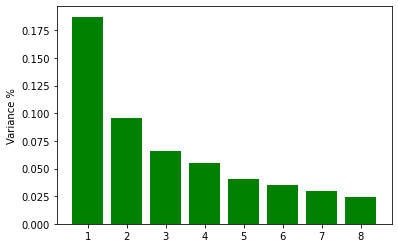

In [ ]:
plotPCAvariance(pca, PCA_components)

a [0.4        0.76078431 0.64705882 1.        ]
b [0.98823529 0.55294118 0.38431373 1.        ]
b̞ [0.55294118 0.62745098 0.79607843 1.        ]
d [0.90588235 0.54117647 0.76470588 1.        ]
e [0.65098039 0.84705882 0.32941176 1.        ]
f [1.         0.85098039 0.18431373 1.        ]
i [0.89803922 0.76862745 0.58039216 1.        ]
iː [0.70196078 0.70196078 0.70196078 1.        ]
j [0.70196078 0.70196078 0.70196078 1.        ]
k [0.70196078 0.70196078 0.70196078 1.        ]
kʰ [0.70196078 0.70196078 0.70196078 1.        ]
m [0.70196078 0.70196078 0.70196078 1.        ]
n [0.70196078 0.70196078 0.70196078 1.        ]
o [0.70196078 0.70196078 0.70196078 1.        ]
p [0.70196078 0.70196078 0.70196078 1.        ]
s̪ [0.70196078 0.70196078 0.70196078 1.        ]
t [0.70196078 0.70196078 0.70196078 1.        ]
ts [0.70196078 0.70196078 0.70196078 1.        ]
tsʰ [0.70196078 0.70196078 0.70196078 1.        ]
tɕ [0.70196078 0.70196078 0.70196078 1.        ]
tɕʰ [0.70196078 0.70196078 0.701

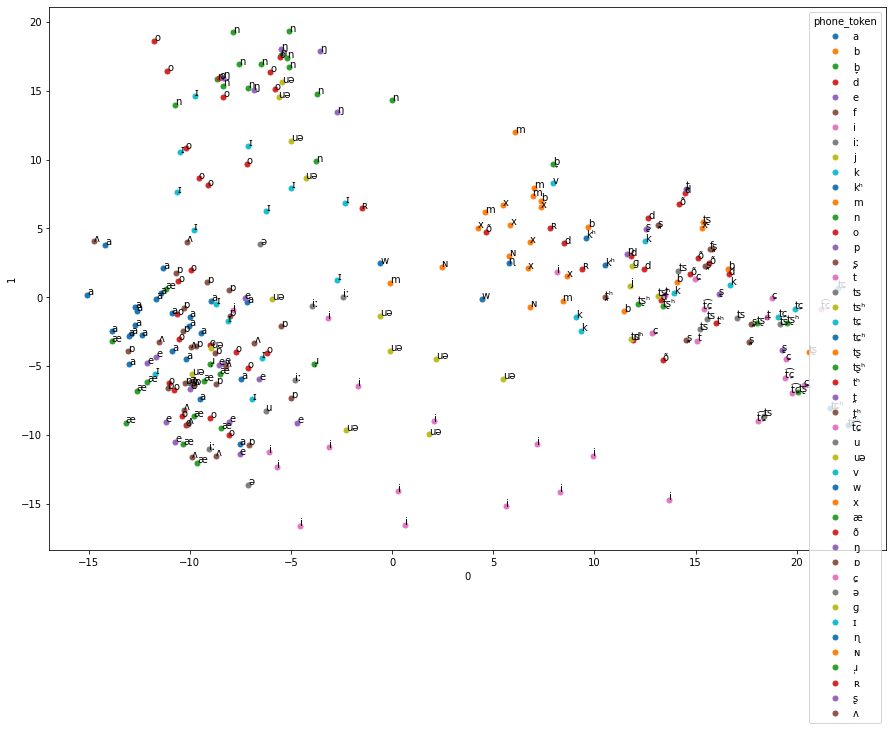

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x_col = 0
y_col = 1
hue_col = 'phone_token'
palette = 'Set2'
size = 5

PCA_components['phone_token'] = train_data['phone_token'].tolist()

fig, ax = plt.subplots(figsize=(15,10))
colors = matplotlib.cm.get_cmap(palette)(range(len(train_data[hue_col].unique())))
for (g,temp),c in zip(PCA_components.groupby('phone_token'),colors):
    print(g,c)
    ax.plot(temp[x_col], temp[y_col], 'o', label=g ,ms=size)
    for i,row in temp.iterrows():
        ax.annotate(PCA_components['phone_token'][i], 
                    xy=(row[x_col],row[y_col]), 
                    alpha=1)
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.legend(title=hue_col)

In [ ]:
'KMeans'
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

 mid_ho

In [ ]:
midlist = []
for i,r in ho_df.iterrows():
  if r['mid_ho']==1:
    midlist.append(r['filename'])

len(midlist)

8

In [ ]:
# build front_vec_matrix
import pandas as pd

cols = list(range(0,640))
mid_vec_matrix = pd.DataFrame(columns=cols)

for filename in midlist:
  emit_frames = recog.recognize('./train/'+filename)
  
  for i in range(len(emit_frames)):
    phone = emit_frames[i].phone_token
    one_phone_vec = pd.DataFrame(emit_frames[i].bilstm_h.reshape(1,-1), columns=cols, index=[phone])

    mid_vec_matrix = pd.concat([mid_vec_matrix, one_phone_vec])

In [ ]:
mid_vec_matrix.shape

(164, 640)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(mid_vec_matrix, random_state=111, train_size=0.8)

In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(train_data) 

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

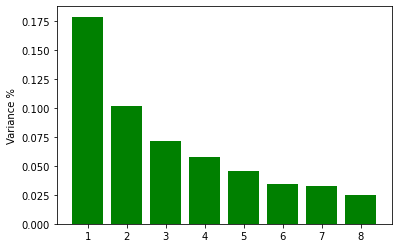

In [ ]:
plotPCAvariance(pca, PCA_components)

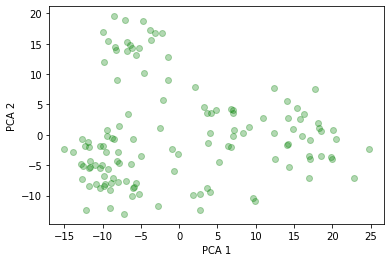

In [ ]:
plotPCAcomponents(pca, PCA_components)

In [ ]:
'KMeans'
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])

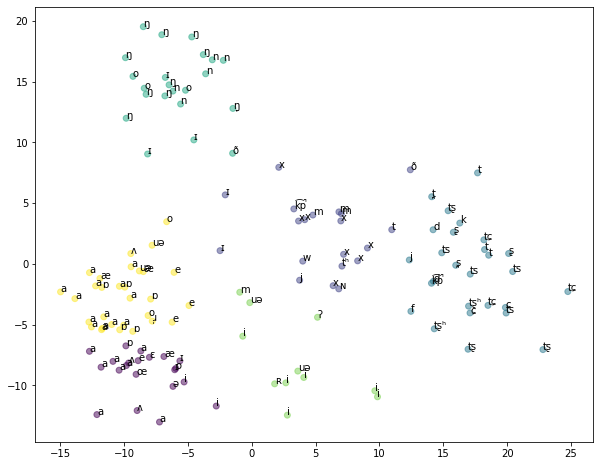

In [ ]:
plotKMeans(model, PCA_components, train_data)

 end_ho

In [ ]:
endlist = []
for i,r in ho_df.iterrows():
  if r['end_ho']==1:
    endlist.append(r['filename'])

endlist

['48_陳椒華-127925.wav', '84_陳椒華-127925.wav', '87_陳椒華-127925.wav']

In [ ]:
# build front_vec_matrix
import pandas as pd

cols = list(range(0,640))
end_vec_matrix = pd.DataFrame(columns=cols)

for filename in endlist:
  emit_frames = recog.recognize('./train/'+filename)
  
  for i in range(len(emit_frames)):
    phone = emit_frames[i].phone_token
    one_phone_vec = pd.DataFrame(emit_frames[i].bilstm_h.reshape(1,-1), columns=cols, index=[phone])

    end_vec_matrix = pd.concat([end_vec_matrix, one_phone_vec])

In [ ]:
end_vec_matrix.shape

(78, 640)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(end_vec_matrix, random_state=121, train_size=0.8)

In [ ]:
'PCA'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_df = StandardScaler().fit_transform(train_data) 

pca = PCA(n_components=8)
pca_fitted = pca.fit_transform(std_df)

# 存成df
PCA_components = pd.DataFrame(pca_fitted)

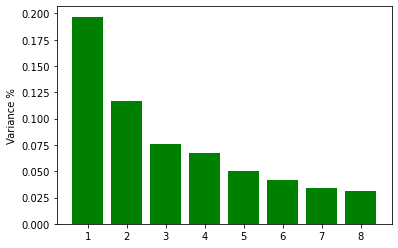

In [ ]:
plotPCAvariance(pca, PCA_components)

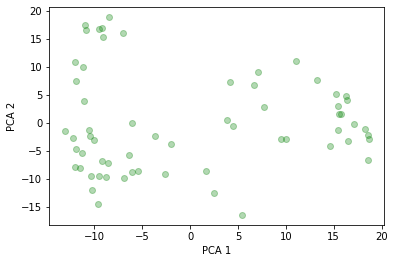

In [ ]:
plotPCAcomponents(pca, PCA_components)

In [ ]:
'KMeans'
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])

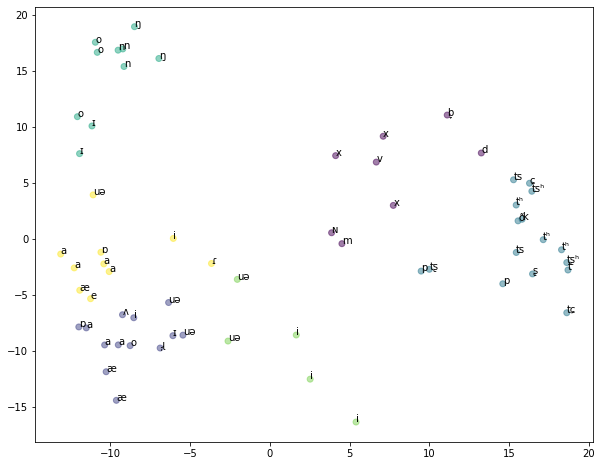

In [ ]:
plotKMeans(model, PCA_components, train_data)

## Sean Decoding

In [ ]:
from allosaurus.app import read_recognizer

# load your model
model = read_recognizer()

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


downloading model  latest
from:  https://github.com/xinjli/allosaurus/releases/download/v1.0/latest.tar.gz
to:    /usr/local/lib/python3.7/dist-packages/allosaurus/pretrained
please wait...


In [ ]:
!wget https://github.com/cckk2913/allosaurus/raw/emit-frame-info/sample.wav

--2022-07-19 06:32:45--  https://github.com/cckk2913/allosaurus/raw/emit-frame-info/sample.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cckk2913/allosaurus/emit-frame-info/sample.wav [following]
--2022-07-19 06:32:45--  https://raw.githubusercontent.com/cckk2913/allosaurus/emit-frame-info/sample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17096 (17K) [audio/wav]
Saving to: ‘sample.wav’

sample.wav          100%[===================>]  16.70K  --.-KB/s    in 0.001s  

2022-07-19 06:32:45 (14.1 MB/s) - ‘sample.wav’ saved [17096/17096]



In [ ]:
# run inference -> æ l u s ɔ ɹ s
emit_frames = model.recognize('sample.wav')

In [ ]:
print(emit_frames)

[<EmitFrameInfo æ @  0.21>, <EmitFrameInfo l @  0.39>, <EmitFrameInfo u @  0.45>, <EmitFrameInfo s @  0.54>, <EmitFrameInfo ɔ @  0.63>, <EmitFrameInfo ɹ @  0.72>, <EmitFrameInfo s @  0.87>]


In [ ]:
len(emit_frames)

7

In [ ]:
# emit frame indices and offset(in second)
emit_frames[0].offset_idx, emit_frames[0].offset_s

(7, 0.21)

In [ ]:
emit_frames[0].phone_token

'æ'

In [ ]:
emit_frames[0].mfcc_vec.shape

(120,)

In [ ]:
emit_frames[0].bilstm_h.shape

(640,)

In [ ]:
emit_frames[0].phone_logits.shape

(230,)